In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
from astropy import units as u 
import astrospice
from astropy.time import Time
from sunpy.coordinates import frames
from sunpy.net import Fido, attrs as a
from stixpy.net.client import STIXClient
import matplotlib.pyplot as plt
import numpy as np 

In [2]:
stix_big_flares = pd.read_csv("stix_all_flare_list_20221109_20221114_with_files.csv")

In [3]:
stix_big_flares.head()

,flare_id,duration,att_in,peak_UTC,LC0_BKG,_id,GOES_class,GOES_flux,CFL_X_arcsec,CFL_Y_arcsec,...,LC1_PEAK_COUNTS_4S,LC1_BKG_COUNTS_4S,LC2_PEAK_COUNTS_4S,LC2_BKG_COUNTS_4S,LC3_PEAK_COUNTS_4S,LC3_BKG_COUNTS_4S,LC4_PEAK_COUNTS_4S,LC4_BKG_COUNTS_4S,number_available_files,available_file_request_IDs
0,2211090050,492,False,2022-11-09 00:50:20.013,217.688788,18265,B6.1,6.073233e-07,NaN,NaN,...,271,41.0,135,57.0,799,735.0,463,399.0,1,[2211090305]
1,2211090720,628,False,2022-11-09 07:20:44.052,217.690166,18273,B9.6,9.645386e-07,NaN,NaN,...,247,45.0,115,57.0,799,735.0,463,399.0,1,[2211091049]
2,2211090908,976,False,2022-11-09 09:08:44.063,217.690166,18275,B6.6,6.582638e-07,NaN,NaN,...,135,45.0,107,57.0,863,735.0,463,399.0,1,[2211096407]
3,2211090958,636,False,2022-11-09 09:58:44.069,217.690166,18277,B6.2,6.191904e-07,NaN,NaN,...,75,45.0,75,57.0,799,735.0,463,399.0,1,[2211091409]
4,2211091013,296,False,2022-11-09 10:13:24.070,217.690166,18278,B6.2,6.162408e-07,NaN,NaN,...,115,45.0,75,57.0,799,735.0,463,399.0,1,[2211091673]


In [4]:
flare_peak_times = Time.strptime(stix_big_flares["peak_UTC"].values.astype(str), format_string="%Y-%m-%d %H:%M:%S.%f")

In [5]:
kernals = astrospice.registry.get_kernels("solar orbiter", "predict")

/opt/anaconda3/envs/stix_conda/lib/python3.10/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "dtf2d" yielded 1 of "dubious year (Note 6)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

In [6]:
solo_coords = astrospice.generate_coords("SOLAR ORBITER", flare_peak_times).heliographic_stonyhurst
earth_coords = astrospice.generate_coords("earth", flare_peak_times).heliographic_stonyhurst

In [7]:
stix_big_flares["solo_lat"] = solo_coords.lat.value
stix_big_flares["solo_lon"] = solo_coords.lon.value
stix_big_flares["solo_AU_distance"] = solo_coords.radius.to(u.AU).value

In [8]:
stix_big_flares.keys()

Index(['flare_id', 'duration', 'att_in', 'peak_UTC', 'LC0_BKG', '_id',
       'GOES_class', 'GOES_flux', 'CFL_X_arcsec', 'CFL_Y_arcsec', 'start_UTC',
       'end_UTC', 'LC0_PEAK_COUNTS_4S', 'LC0_BKG_COUNTS_4S',
       'LC1_PEAK_COUNTS_4S', 'LC1_BKG_COUNTS_4S', 'LC2_PEAK_COUNTS_4S',
       'LC2_BKG_COUNTS_4S', 'LC3_PEAK_COUNTS_4S', 'LC3_BKG_COUNTS_4S',
       'LC4_PEAK_COUNTS_4S', 'LC4_BKG_COUNTS_4S', 'number_available_files',
       'available_file_request_IDs', 'solo_lat', 'solo_lon',
       'solo_AU_distance'],
      dtype='object')

In [9]:
stix_big_flares.rename(columns={'LC0_PEAK_COUNTS_4S': '4-10 keV', 
                                'LC1_PEAK_COUNTS_4S': "10-15 keV",
                                'LC2_PEAK_COUNTS_4S': "15-25 keV", 
                                'LC3_PEAK_COUNTS_4S': "25-50 keV", 
                                'LC4_PEAK_COUNTS_4S': "50-84 keV"}, inplace=True)

In [10]:
stix_big_flares.keys()

Index(['flare_id', 'duration', 'att_in', 'peak_UTC', 'LC0_BKG', '_id',
       'GOES_class', 'GOES_flux', 'CFL_X_arcsec', 'CFL_Y_arcsec', 'start_UTC',
       'end_UTC', '4-10 keV', 'LC0_BKG_COUNTS_4S', '10-15 keV',
       'LC1_BKG_COUNTS_4S', '15-25 keV', 'LC2_BKG_COUNTS_4S', '25-50 keV',
       'LC3_BKG_COUNTS_4S', '50-84 keV', 'LC4_BKG_COUNTS_4S',
       'number_available_files', 'available_file_request_IDs', 'solo_lat',
       'solo_lon', 'solo_AU_distance'],
      dtype='object')

In [11]:
columns = ['flare_id', 'att_in','GOES_flux', 'start_UTC', 'peak_UTC', 'end_UTC', '4-10 keV', '10-15 keV',
           'number_available_files', 'available_file_request_IDs', 'solo_lat', 'solo_lon',
           'solo_AU_distance', '15-25 keV','25-50 keV', '50-84 keV', 'GOES_class']

In [12]:
stix_flares_tidy = stix_big_flares[columns]

## Lets find all flares with pixel data

In [13]:
no_pixel_files = stix_flares_tidy[stix_flares_tidy["number_available_files"]==0]
no_pixel_files.to_csv('flares_apparently_without_pixel_data.csv') # (from Fido)

In [14]:
len(no_pixel_files)

11

In [15]:
stix_flare_w_files = stix_flares_tidy[stix_flares_tidy["number_available_files"]>=1]
stix_flare_w_files.reset_index(inplace=True, drop=True)

In [16]:
len(stix_flare_w_files)/len(stix_flares_tidy), len(stix_flare_w_files), len(stix_flares_tidy)

(0.9438775510204082, 185, 196)

In [17]:
pd.set_option('mode.chained_assignment', None)


In [18]:
stix_flare_w_files.loc[:, "Request IDs"] = stix_flare_w_files["available_file_request_IDs"].map(lambda x: x.strip('][').split(', ')[0])


In [19]:
stix_flare_w_files

,flare_id,att_in,GOES_flux,start_UTC,peak_UTC,end_UTC,4-10 keV,10-15 keV,number_available_files,available_file_request_IDs,solo_lat,solo_lon,solo_AU_distance,15-25 keV,25-50 keV,50-84 keV,GOES_class,Request IDs
0,2211090050,False,6.073233e-07,2022-11-09T00:44:44.012,2022-11-09 00:50:20.013,2022-11-09T00:52:56.013,1215,271,1,[2211090305],9.180063,-24.156920,0.590873,135,799,463,B6.1,2211090305
1,2211090720,False,9.645386e-07,2022-11-09T07:18:12.052,2022-11-09 07:20:44.052,2022-11-09T07:28:40.053,2431,247,1,[2211091049],9.176525,-23.910781,0.594137,115,799,463,B9.6,2211091049
2,2211090908,False,6.582638e-07,2022-11-09T08:58:40.062,2022-11-09 09:08:44.063,2022-11-09T09:14:56.064,607,135,1,[2211096407],9.175424,-23.843695,0.595037,107,863,463,B6.6,2211096407
3,2211090958,False,6.191904e-07,2022-11-09T09:55:28.068,2022-11-09 09:58:44.069,2022-11-09T10:06:04.069,607,75,1,[2211091409],9.174897,-23.812783,0.595453,75,799,463,B6.2,2211091409
4,2211091013,False,6.162408e-07,2022-11-09T10:11:28.070,2022-11-09 10:13:24.070,2022-11-09T10:16:24.070,735,115,1,[2211091673],9.174741,-23.803733,0.595575,75,799,463,B6.2,2211091673
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180,2211142151,False,4.388000e-06,2022-11-14T21:29:48.099,2022-11-14 21:51:20.101,2022-11-14T22:08:04.103,29695,2943,2,"[2211145517, 2211140731]",8.978725,-19.941204,0.658157,335,863,463,C4.4,2211145517
181,2211142250,False,2.930119e-06,2022-11-14T22:19:44.104,2022-11-14 22:50:36.107,2022-11-14T23:08:28.109,6399,463,2,"[2211147867, 2211143309]",8.976581,-19.918901,0.658602,123,799,463,C2.9,2211147867
182,2211142310,False,2.244843e-06,2022-11-14T23:09:56.109,2022-11-14 23:10:52.110,2022-11-14T23:11:48.110,543,67,1,[2211147867],8.975846,-19.911295,0.658754,75,799,431,C2.2,2211147867
183,2211142324,False,1.959793e-06,2022-11-14T23:23:56.111,2022-11-14 23:24:48.111,2022-11-14T23:25:48.111,735,91,1,[2211141248],8.975340,-19.906072,0.658859,91,799,431,C2.0,2211141248


In [20]:
def get_pixel_data(tstart, tend, request_id):
    res = Fido.search(a.Time(tstart, tend), a.Instrument.stix, a.stix.DataProduct.sci_xray_cpd)
    res = res["stix"][res["stix"]["Request ID"] == int(request_id)]
    f = Fido.fetch(res, path="./pixel_data/{file}")
    if len(f)>0:
        return "./"+f[0]
    else:
        return ''

def get_aux_data(tstart, tend):
    res = Fido.search(a.Time(tstart, tend), a.Instrument.stix, a.stix.DataProduct.aux_ephemeris)
    f = Fido.fetch(res, path="./aux_data/{file}")
    if len(f)>0:
        return "./"+f[0]
    else:
        return ''

In [21]:
len(stix_flare_w_files)

185

In [22]:
stix_flare_w_files.head()

,flare_id,att_in,GOES_flux,start_UTC,peak_UTC,end_UTC,4-10 keV,10-15 keV,number_available_files,available_file_request_IDs,solo_lat,solo_lon,solo_AU_distance,15-25 keV,25-50 keV,50-84 keV,GOES_class,Request IDs
0,2211090050,False,6.073233e-07,2022-11-09T00:44:44.012,2022-11-09 00:50:20.013,2022-11-09T00:52:56.013,1215,271,1,[2211090305],9.180063,-24.156920,0.590873,135,799,463,B6.1,2211090305
1,2211090720,False,9.645386e-07,2022-11-09T07:18:12.052,2022-11-09 07:20:44.052,2022-11-09T07:28:40.053,2431,247,1,[2211091049],9.176525,-23.910781,0.594137,115,799,463,B9.6,2211091049
2,2211090908,False,6.582638e-07,2022-11-09T08:58:40.062,2022-11-09 09:08:44.063,2022-11-09T09:14:56.064,607,135,1,[2211096407],9.175424,-23.843695,0.595037,107,863,463,B6.6,2211096407
3,2211090958,False,6.191904e-07,2022-11-09T09:55:28.068,2022-11-09 09:58:44.069,2022-11-09T10:06:04.069,607,75,1,[2211091409],9.174897,-23.812783,0.595453,75,799,463,B6.2,2211091409
4,2211091013,False,6.162408e-07,2022-11-09T10:11:28.070,2022-11-09 10:13:24.070,2022-11-09T10:16:24.070,735,115,1,[2211091673],9.174741,-23.803733,0.595575,75,799,463,B6.2,2211091673


In [23]:
aux_paths = []
pixel_paths = []
for i in range(len(stix_flare_w_files)):
    row = stix_flare_w_files.iloc[i]
    tstart, tend, request_id = row["start_UTC"], row["end_UTC"], row["Request IDs"]
    pixel_paths.append(get_pixel_data(tstart, tend, request_id))
    aux_paths.append(get_aux_data(tstart, tend))
    

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Exception ignored in: <function BaseEventLoop.__del__ at 0x10daccb80>
Traceback (most recent call last):
  File "/opt/anaconda3/envs/stix_conda/lib/python3.10/asyncio/base_events.py", line 682, in __del__
    self.close()
  File "/opt/anaconda3/envs/stix_conda/lib/python3.10/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/opt/anaconda3/envs/stix_conda/lib/python3.10/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/opt/anaconda3/envs/stix_conda/lib/python3.10/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
ValueError: signal only works in main thread of the main interpreter
Exception ignored in: <function BaseEventLoop.__del__ at 0x10daccb80>
Traceback (most recent call last):
  File "/opt/anaconda3/envs/stix_conda/lib/python3.10/asyncio/base_events.py", line 682, in __del__
    self.close()
  File "/opt/anaconda3/envs/stix_conda/lib/pyt

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/2 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221112T000334-20221112T010230_V01_2211125869-55148.fits:   0%|          | 0.00/1.4…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20221112_V01.fits:   0%|          | 0.00/397k [00:00<?, ?B/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221112T011450-20221112T012630_V01_2211122872-54729.fits:   0%|          | 0.00/69.…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221112T021410-20221112T023310_V01_2211128850-54730.fits:   0%|          | 0.00/2.4…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221112T031155-20221112T033352_V01_2211126219-54731.fits:   0%|          | 0.00/386…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221112T042752-20221112T043349_V01_2211122670-50746.fits:   0%|          | 0.00/1.6…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221112T043625-20221112T044056_V01_2211128403-54732.fits:   0%|          | 0.00/386…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221112T060311-20221112T060741_V01_2211128970-54733.fits:   0%|          | 0.00/467…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221112T064925-20221112T074705_V01_2211125198-54735.fits:   0%|          | 0.00/521…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221112T094326-20221112T100850_V01_2211128100-54737.fits:   0%|          | 0.00/69.…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221112T115058-20221112T115741_V01_2211128495-54738.fits:   0%|          | 0.00/150…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221112T121701-20221112T124012_V01_2211125576-54739.fits:   0%|          | 0.00/420…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221112T124452-20221112T142451_V01_2211124232-54740.fits:   0%|          | 0.00/873…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221112T142751-20221112T143245_V01_2211127520-54741.fits:   0%|          | 0.00/66.…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221112T144207-20221112T144532_V01_2211127241-54742.fits:   0%|          | 0.00/66.…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221112T144700-20221112T152424_V01_2211129187-54743.fits:   0%|          | 0.00/996…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221112T152240-20221112T154703_V01_2211123760-54744.fits:   0%|          | 0.00/438…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221112T154949-20221112T160231_V01_2211125558-54745.fits:   0%|          | 0.00/69.…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221112T161756-20221112T171920_V01_2211124875-54746.fits:   0%|          | 0.00/1.2…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221112T173153-20221112T175733_V01_2211121565-54747.fits:   0%|          | 0.00/392…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221112T175715-20221112T180135_V01_2211124837-54910.fits:   0%|          | 0.00/14.…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Exception ignored in: <function BaseEventLoop.__del__ at 0x10daccb80>
Traceback (most recent call last):
  File "/opt/anaconda3/envs/stix_conda/lib/python3.10/asyncio/base_events.py", line 682, in __del__
    self.close()
  File "/opt/anaconda3/envs/stix_conda/lib/python3.10/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/opt/anaconda3/envs/stix_conda/lib/python3.10/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/opt/anaconda3/envs/stix_conda/lib/python3.10/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
ValueError: signal only works in main thread of the main interpreter
Exception ignored in: <function BaseEventLoop.__del__ at 0x10daccb80>
Traceback (most recent call last):
  File "/opt/anaconda3/envs/stix_conda/lib/python3.10/asyncio/base_events.py", line 682, in __del__
    self.close()
  File "/opt/anaconda3/envs/stix_conda/lib/pyt

solo_L1_stix-sci-xray-cpd_20221112T180330-20221112T182151_V01_2211124459-55146.fits:   0%|          | 0.00/1.4…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221112T200717-20221112T201243_V01_2211122486-54749.fits:   0%|          | 0.00/66.…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Exception ignored in: <function BaseEventLoop.__del__ at 0x10daccb80>
Traceback (most recent call last):
  File "/opt/anaconda3/envs/stix_conda/lib/python3.10/asyncio/base_events.py", line 682, in __del__
    self.close()
  File "/opt/anaconda3/envs/stix_conda/lib/python3.10/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/opt/anaconda3/envs/stix_conda/lib/python3.10/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/opt/anaconda3/envs/stix_conda/lib/python3.10/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
ValueError: signal only works in main thread of the main interpreter
Exception ignored in: <function BaseEventLoop.__del__ at 0x10daccb80>
Traceback (most recent call last):
  File "/opt/anaconda3/envs/stix_conda/lib/python3.10/asyncio/base_events.py", line 682, in __del__
    self.close()
  File "/opt/anaconda3/envs/stix_conda/lib/pyt

solo_L1_stix-sci-xray-cpd_20221112T203220-20221112T211141_V01_2211120140-54750.fits:   0%|          | 0.00/795…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221112T214821-20221112T220158_V01_2211128626-54751.fits:   0%|          | 0.00/752…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Exception ignored in: <function BaseEventLoop.__del__ at 0x10daccb80>
Traceback (most recent call last):
  File "/opt/anaconda3/envs/stix_conda/lib/python3.10/asyncio/base_events.py", line 682, in __del__
    self.close()
  File "/opt/anaconda3/envs/stix_conda/lib/python3.10/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/opt/anaconda3/envs/stix_conda/lib/python3.10/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/opt/anaconda3/envs/stix_conda/lib/python3.10/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
ValueError: signal only works in main thread of the main interpreter
Exception ignored in: <function BaseEventLoop.__del__ at 0x10daccb80>
Traceback (most recent call last):
  File "/opt/anaconda3/envs/stix_conda/lib/python3.10/asyncio/base_events.py", line 682, in __del__
    self.close()
  File "/opt/anaconda3/envs/stix_conda/lib/pyt

solo_L1_stix-sci-xray-cpd_20221112T221218-20221112T222236_V01_2211124230-54752.fits:   0%|          | 0.00/66.…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221113T000809-20221113T002643_V01_2211135045-54754.fits:   0%|          | 0.00/69.…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20221113_V01.fits:   0%|          | 0.00/397k [00:00<?, ?B/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221113T005923-20221113T012311_V01_2211132712-54755.fits:   0%|          | 0.00/510…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221113T012411-20221113T013503_V01_2211137388-54756.fits:   0%|          | 0.00/66.…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221113T015437-20221113T022725_V01_2211135081-54757.fits:   0%|          | 0.00/1.2…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Exception ignored in: <function BaseEventLoop.__del__ at 0x10daccb80>
Traceback (most recent call last):
  File "/opt/anaconda3/envs/stix_conda/lib/python3.10/asyncio/base_events.py", line 682, in __del__
    self.close()
  File "/opt/anaconda3/envs/stix_conda/lib/python3.10/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/opt/anaconda3/envs/stix_conda/lib/python3.10/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/opt/anaconda3/envs/stix_conda/lib/python3.10/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
ValueError: signal only works in main thread of the main interpreter
Exception ignored in: <function BaseEventLoop.__del__ at 0x10daccb80>
Traceback (most recent call last):
  File "/opt/anaconda3/envs/stix_conda/lib/python3.10/asyncio/base_events.py", line 682, in __del__
    self.close()
  File "/opt/anaconda3/envs/stix_conda/lib/pyt

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221113T031046-20221113T031926_V01_2211136211-54758.fits:   0%|          | 0.00/184…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221113T033426-20221113T041157_V01_2211130406-54759.fits:   0%|          | 0.00/412…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221113T041117-20221113T041800_V01_2211138222-50747.fits:   0%|          | 0.00/775…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221113T042746-20221113T043423_V01_2211133272-54760.fits:   0%|          | 0.00/302…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221113T043218-20221113T055406_V01_2211138751-54761.fits:   0%|          | 0.00/706…

Exception ignored in: <function BaseEventLoop.__del__ at 0x10daccb80>
Traceback (most recent call last):
  File "/opt/anaconda3/envs/stix_conda/lib/python3.10/asyncio/base_events.py", line 682, in __del__
    self.close()
  File "/opt/anaconda3/envs/stix_conda/lib/python3.10/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/opt/anaconda3/envs/stix_conda/lib/python3.10/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/opt/anaconda3/envs/stix_conda/lib/python3.10/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
ValueError: signal only works in main thread of the main interpreter
Exception ignored in: <function BaseEventLoop.__del__ at 0x10daccb80>
Traceback (most recent call last):
  File "/opt/anaconda3/envs/stix_conda/lib/python3.10/asyncio/base_events.py", line 682, in __del__
    self.close()
  File "/opt/anaconda3/envs/stix_conda/lib/pyt

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221113T055642-20221113T060445_V01_2211133301-54762.fits:   0%|          | 0.00/639…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221113T061348-20221113T062353_V01_2211132304-52143.fits:   0%|          | 0.00/4.4…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221113T062338-20221113T064645_V01_2211131808-54763.fits:   0%|          | 0.00/236…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221113T064525-20221113T065617_V01_2211134748-54764.fits:   0%|          | 0.00/271…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Exception ignored in: <function BaseEventLoop.__del__ at 0x10daccb80>
Traceback (most recent call last):
  File "/opt/anaconda3/envs/stix_conda/lib/python3.10/asyncio/base_events.py", line 682, in __del__
    self.close()
  File "/opt/anaconda3/envs/stix_conda/lib/python3.10/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/opt/anaconda3/envs/stix_conda/lib/python3.10/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/opt/anaconda3/envs/stix_conda/lib/python3.10/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
ValueError: signal only works in main thread of the main interpreter
Exception ignored in: <function BaseEventLoop.__del__ at 0x10daccb80>
Traceback (most recent call last):
  File "/opt/anaconda3/envs/stix_conda/lib/python3.10/asyncio/base_events.py", line 682, in __del__
    self.close()
  File "/opt/anaconda3/envs/stix_conda/lib/pyt

solo_L1_stix-sci-xray-cpd_20221113T071811-20221113T074019_V01_2211138416-54766.fits:   0%|          | 0.00/69.…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221113T074316-20221113T080552_V01_2211137431-54767.fits:   0%|          | 0.00/708…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221113T091031-20221113T094213_V01_2211138455-54769.fits:   0%|          | 0.00/302…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221113T111046-20221113T111512_V01_2211137120-54770.fits:   0%|          | 0.00/444…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221113T122118-20221113T123447_V01_2211132241-54773.fits:   0%|          | 0.00/251…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221113T124907-20221113T130715_V01_2211138362-54774.fits:   0%|          | 0.00/1.2…

Exception ignored in: <function BaseEventLoop.__del__ at 0x10daccb80>
Traceback (most recent call last):
  File "/opt/anaconda3/envs/stix_conda/lib/python3.10/asyncio/base_events.py", line 682, in __del__
    self.close()
  File "/opt/anaconda3/envs/stix_conda/lib/python3.10/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/opt/anaconda3/envs/stix_conda/lib/python3.10/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/opt/anaconda3/envs/stix_conda/lib/python3.10/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
ValueError: signal only works in main thread of the main interpreter
Exception ignored in: <function BaseEventLoop.__del__ at 0x10daccb80>
Traceback (most recent call last):
  File "/opt/anaconda3/envs/stix_conda/lib/python3.10/asyncio/base_events.py", line 682, in __del__
    self.close()
  File "/opt/anaconda3/envs/stix_conda/lib/pyt

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221113T141640-20221113T142523_V01_2211133776-55145.fits:   0%|          | 0.00/553…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221113T154626-20221113T163159_V01_2211139008-54778.fits:   0%|          | 0.00/994…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221113T164813-20221113T165417_V01_2211137589-50786.fits:   0%|          | 0.00/1.1…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221113T170653-20221113T171555_V01_2211136274-54779.fits:   0%|          | 0.00/202…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221113T172215-20221113T174320_V01_2211132897-54780.fits:   0%|          | 0.00/386…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221113T174722-20221113T181541_V01_2211131374-54781.fits:   0%|          | 0.00/487…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221113T193017-20221113T223329_V01_2211139227-56324.fits:   0%|          | 0.00/4.4…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221113T223816-20221113T225554_V01_2211136551-54789.fits:   0%|          | 0.00/337…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221113T230113-20221113T230618_V01_2211134639-54790.fits:   0%|          | 0.00/66.…

Exception ignored in: <function BaseEventLoop.__del__ at 0x10daccb80>
Traceback (most recent call last):
  File "/opt/anaconda3/envs/stix_conda/lib/python3.10/asyncio/base_events.py", line 682, in __del__
    self.close()
  File "/opt/anaconda3/envs/stix_conda/lib/python3.10/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/opt/anaconda3/envs/stix_conda/lib/python3.10/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/opt/anaconda3/envs/stix_conda/lib/python3.10/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
ValueError: signal only works in main thread of the main interpreter
Exception ignored in: <function BaseEventLoop.__del__ at 0x10daccb80>
Traceback (most recent call last):
  File "/opt/anaconda3/envs/stix_conda/lib/python3.10/asyncio/base_events.py", line 682, in __del__
    self.close()
  File "/opt/anaconda3/envs/stix_conda/lib/pyt

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221113T231345-20221113T231934_V01_2211134872-54791.fits:   0%|          | 0.00/487…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221113T232020-20221113T232352_V01_2211131187-54792.fits:   0%|          | 0.00/66.…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221113T232519-20221113T232944_V01_2211135705-54793.fits:   0%|          | 0.00/69.…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221113T233505-20221113T233747_V01_2211133513-54794.fits:   0%|          | 0.00/66.…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221113T233747-20221114T001011_V01_2211131162-54795.fits:   0%|          | 0.00/890…

Files Downloaded:   0%|          | 0/2 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20221114_V01.fits:   0%|          | 0.00/397k [00:00<?, ?B/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221114T003055-20221114T010844_V01_2211142740-54798.fits:   0%|          | 0.00/1.0…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221114T011144-20221114T012921_V01_2211141346-54799.fits:   0%|          | 0.00/524…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221114T015250-20221114T015626_V01_2211149386-54800.fits:   0%|          | 0.00/66.…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221114T020015-20221114T023340_V01_2211149572-54801.fits:   0%|          | 0.00/890…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221114T024020-20221114T031936_V01_2211147410-54802.fits:   0%|          | 0.00/1.0…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221114T032653-20221114T033851_V01_2211146178-54803.fits:   0%|          | 0.00/69.…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221114T033928-20221114T041700_V01_2211144119-54804.fits:   0%|          | 0.00/996…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221114T041933-20221114T044003_V01_2211140911-54805.fits:   0%|          | 0.00/219…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221114T044832-20221114T045757_V01_2211148919-54806.fits:   0%|          | 0.00/202…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221114T050416-20221114T052548_V01_2211146873-54807.fits:   0%|          | 0.00/403…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221114T053129-20221114T053705_V01_2211148216-54808.fits:   0%|          | 0.00/66.…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221114T054456-20221114T054749_V01_2211149264-54809.fits:   0%|          | 0.00/66.…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221114T055420-20221114T055738_V01_2211142068-54810.fits:   0%|          | 0.00/66.…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221114T055804-20221114T070215_V01_2211147455-54811.fits:   0%|          | 0.00/1.3…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221114T070200-20221114T072423_V01_2211147324-55143.fits:   0%|          | 0.00/628…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221114T072249-20221114T082925_V01_2211148533-54812.fits:   0%|          | 0.00/714…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Exception ignored in: <function BaseEventLoop.__del__ at 0x10daccb80>
Traceback (most recent call last):
  File "/opt/anaconda3/envs/stix_conda/lib/python3.10/asyncio/base_events.py", line 682, in __del__
    self.close()
  File "/opt/anaconda3/envs/stix_conda/lib/python3.10/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/opt/anaconda3/envs/stix_conda/lib/python3.10/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/opt/anaconda3/envs/stix_conda/lib/python3.10/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
ValueError: signal only works in main thread of the main interpreter
Exception ignored in: <function BaseEventLoop.__del__ at 0x10daccb80>
Traceback (most recent call last):
  File "/opt/anaconda3/envs/stix_conda/lib/python3.10/asyncio/base_events.py", line 682, in __del__
    self.close()
  File "/opt/anaconda3/envs/stix_conda/lib/pyt

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221114T082343-20221114T092008_V01_2211147925-54870.fits:   0%|          | 0.00/1.4…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Exception ignored in: <function BaseEventLoop.__del__ at 0x10daccb80>
Traceback (most recent call last):
  File "/opt/anaconda3/envs/stix_conda/lib/python3.10/asyncio/base_events.py", line 682, in __del__
    self.close()
  File "/opt/anaconda3/envs/stix_conda/lib/python3.10/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/opt/anaconda3/envs/stix_conda/lib/python3.10/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/opt/anaconda3/envs/stix_conda/lib/python3.10/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
ValueError: signal only works in main thread of the main interpreter
Exception ignored in: <function BaseEventLoop.__del__ at 0x10daccb80>
Traceback (most recent call last):
  File "/opt/anaconda3/envs/stix_conda/lib/python3.10/asyncio/base_events.py", line 682, in __del__
    self.close()
  File "/opt/anaconda3/envs/stix_conda/lib/pyt

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221114T092529-20221114T092831_V01_2211146824-54872.fits:   0%|          | 0.00/66.…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221114T102039-20221114T102740_V01_2211144450-54873.fits:   0%|          | 0.00/708…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221114T103319-20221114T104109_V01_2211146890-54874.fits:   0%|          | 0.00/351…

Exception ignored in: <function BaseEventLoop.__del__ at 0x10daccb80>
Traceback (most recent call last):
  File "/opt/anaconda3/envs/stix_conda/lib/python3.10/asyncio/base_events.py", line 682, in __del__
    self.close()
  File "/opt/anaconda3/envs/stix_conda/lib/python3.10/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/opt/anaconda3/envs/stix_conda/lib/python3.10/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/opt/anaconda3/envs/stix_conda/lib/python3.10/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
ValueError: signal only works in main thread of the main interpreter
Exception ignored in: <function BaseEventLoop.__del__ at 0x10daccb80>
Traceback (most recent call last):
  File "/opt/anaconda3/envs/stix_conda/lib/python3.10/asyncio/base_events.py", line 682, in __del__
    self.close()
  File "/opt/anaconda3/envs/stix_conda/lib/pyt

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221114T105351-20221114T115254_V01_2211140730-54875.fits:   0%|          | 0.00/1.4…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221114T122112-20221114T123330_V01_2211142883-54876.fits:   0%|          | 0.00/66.…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221114T125227-20221114T132445_V01_2211141441-54877.fits:   0%|          | 0.00/864…

Exception ignored in: <function BaseEventLoop.__del__ at 0x10daccb80>
Traceback (most recent call last):
  File "/opt/anaconda3/envs/stix_conda/lib/python3.10/asyncio/base_events.py", line 682, in __del__
    self.close()
  File "/opt/anaconda3/envs/stix_conda/lib/python3.10/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/opt/anaconda3/envs/stix_conda/lib/python3.10/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/opt/anaconda3/envs/stix_conda/lib/python3.10/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
ValueError: signal only works in main thread of the main interpreter
Exception ignored in: <function BaseEventLoop.__del__ at 0x10daccb80>
Traceback (most recent call last):
  File "/opt/anaconda3/envs/stix_conda/lib/python3.10/asyncio/base_events.py", line 682, in __del__
    self.close()
  File "/opt/anaconda3/envs/stix_conda/lib/pyt

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221114T133426-20221114T134357_V01_2211141852-50748.fits:   0%|          | 0.00/5.1…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221114T140644-20221114T141645_V01_2211141520-50790.fits:   0%|          | 0.00/1.3…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221114T141923-20221114T142207_V01_2211146551-54879.fits:   0%|          | 0.00/66.…

Exception ignored in: <function BaseEventLoop.__del__ at 0x10daccb80>
Traceback (most recent call last):
  File "/opt/anaconda3/envs/stix_conda/lib/python3.10/asyncio/base_events.py", line 682, in __del__
    self.close()
  File "/opt/anaconda3/envs/stix_conda/lib/python3.10/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/opt/anaconda3/envs/stix_conda/lib/python3.10/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/opt/anaconda3/envs/stix_conda/lib/python3.10/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
ValueError: signal only works in main thread of the main interpreter
Exception ignored in: <function BaseEventLoop.__del__ at 0x10daccb80>
Traceback (most recent call last):
  File "/opt/anaconda3/envs/stix_conda/lib/python3.10/asyncio/base_events.py", line 682, in __del__
    self.close()
  File "/opt/anaconda3/envs/stix_conda/lib/pyt

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221114T143913-20221114T150958_V01_2211148352-54880.fits:   0%|          | 0.00/539…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221114T145002-20221114T175331_V01_2211145952-56325.fits:   0%|          | 0.00/4.5…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Exception ignored in: <function BaseEventLoop.__del__ at 0x10daccb80>
Traceback (most recent call last):
  File "/opt/anaconda3/envs/stix_conda/lib/python3.10/asyncio/base_events.py", line 682, in __del__
    self.close()
  File "/opt/anaconda3/envs/stix_conda/lib/python3.10/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/opt/anaconda3/envs/stix_conda/lib/python3.10/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/opt/anaconda3/envs/stix_conda/lib/python3.10/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
ValueError: signal only works in main thread of the main interpreter
Exception ignored in: <function BaseEventLoop.__del__ at 0x10daccb80>
Traceback (most recent call last):
  File "/opt/anaconda3/envs/stix_conda/lib/python3.10/asyncio/base_events.py", line 682, in __del__
    self.close()
  File "/opt/anaconda3/envs/stix_conda/lib/pyt

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221114T175317-20221114T185820_V01_2211146020-54887.fits:   0%|          | 0.00/1.3…

Exception ignored in: <function BaseEventLoop.__del__ at 0x10daccb80>
Traceback (most recent call last):
  File "/opt/anaconda3/envs/stix_conda/lib/python3.10/asyncio/base_events.py", line 682, in __del__
    self.close()
  File "/opt/anaconda3/envs/stix_conda/lib/python3.10/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/opt/anaconda3/envs/stix_conda/lib/python3.10/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/opt/anaconda3/envs/stix_conda/lib/python3.10/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
ValueError: signal only works in main thread of the main interpreter
Exception ignored in: <function BaseEventLoop.__del__ at 0x10daccb80>
Traceback (most recent call last):
  File "/opt/anaconda3/envs/stix_conda/lib/python3.10/asyncio/base_events.py", line 682, in __del__
    self.close()
  File "/opt/anaconda3/envs/stix_conda/lib/pyt

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221114T190411-20221114T200012_V01_2211149211-54888.fits:   0%|          | 0.00/3.9…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221114T200258-20221114T201024_V01_2211144192-54889.fits:   0%|          | 0.00/69.…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221114T203522-20221114T205119_V01_2211149647-54890.fits:   0%|          | 0.00/469…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221114T210919-20221114T211606_V01_2211148609-54891.fits:   0%|          | 0.00/1.7…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221114T212938-20221114T214539_V01_2211141558-54893.fits:   0%|          | 0.00/444…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221114T214344-20221114T220820_V01_2211145517-54894.fits:   0%|          | 0.00/366…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221114T221558-20221114T231318_V01_2211147867-54895.fits:   0%|          | 0.00/786…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221114T232129-20221115T000832_V01_2211141248-54896.fits:   0%|          | 0.00/1.2…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

In [24]:
stix_flare_w_files["aux_paths"] = aux_paths
stix_flare_w_files["pixel_paths"] = pixel_paths

In [25]:
stix_flare_w_files.head()

,flare_id,att_in,GOES_flux,start_UTC,peak_UTC,end_UTC,4-10 keV,10-15 keV,number_available_files,available_file_request_IDs,solo_lat,solo_lon,solo_AU_distance,15-25 keV,25-50 keV,50-84 keV,GOES_class,Request IDs,aux_paths,pixel_paths
0,2211090050,False,6.073233e-07,2022-11-09T00:44:44.012,2022-11-09 00:50:20.013,2022-11-09T00:52:56.013,1215,271,1,[2211090305],9.180063,-24.156920,0.590873,135,799,463,B6.1,2211090305,./aux_data/solo_L2_stix-aux-ephemeris_20221109...,./pixel_data/solo_L1_stix-sci-xray-cpd_2022110...
1,2211090720,False,9.645386e-07,2022-11-09T07:18:12.052,2022-11-09 07:20:44.052,2022-11-09T07:28:40.053,2431,247,1,[2211091049],9.176525,-23.910781,0.594137,115,799,463,B9.6,2211091049,./aux_data/solo_L2_stix-aux-ephemeris_20221109...,./pixel_data/solo_L1_stix-sci-xray-cpd_2022110...
2,2211090908,False,6.582638e-07,2022-11-09T08:58:40.062,2022-11-09 09:08:44.063,2022-11-09T09:14:56.064,607,135,1,[2211096407],9.175424,-23.843695,0.595037,107,863,463,B6.6,2211096407,./aux_data/solo_L2_stix-aux-ephemeris_20221109...,./pixel_data/solo_L1_stix-sci-xray-cpd_2022110...
3,2211090958,False,6.191904e-07,2022-11-09T09:55:28.068,2022-11-09 09:58:44.069,2022-11-09T10:06:04.069,607,75,1,[2211091409],9.174897,-23.812783,0.595453,75,799,463,B6.2,2211091409,./aux_data/solo_L2_stix-aux-ephemeris_20221109...,./pixel_data/solo_L1_stix-sci-xray-cpd_2022110...
4,2211091013,False,6.162408e-07,2022-11-09T10:11:28.070,2022-11-09 10:13:24.070,2022-11-09T10:16:24.070,735,115,1,[2211091673],9.174741,-23.803733,0.595575,75,799,463,B6.2,2211091673,./aux_data/solo_L2_stix-aux-ephemeris_20221109...,./pixel_data/solo_L1_stix-sci-xray-cpd_2022110...


In [30]:
stix_big_flares.iloc[-1]

flare_id                                   2211112315
duration                                         1564
att_in                                          False
peak_UTC                      2022-11-11 23:15:11.946
LC0_BKG                                    230.049349
_id                                             18428
GOES_class                                       B9.6
GOES_flux                                    0.000001
CFL_X_arcsec                                      NaN
CFL_Y_arcsec                                      NaN
start_UTC                     2022-11-11T23:00:47.944
end_UTC                       2022-11-11T23:26:51.947
4-10 keV                                          735
LC0_BKG_COUNTS_4S                               247.0
10-15 keV                                          75
LC1_BKG_COUNTS_4S                                45.0
15-25 keV                                          83
LC2_BKG_COUNTS_4S                                57.0
25-50 keV                   

In [24]:
# stix_flare_w_files["15-25 keV"] = stix_big_flares['15-25 keV']
# stix_flare_w_files['25-50 keV'] = stix_big_flares['25-50 keV']
# stix_flare_w_files['50-84 keV'] = stix_big_flares['50-84 keV']
# stix_flare_w_files['GOES_class'] = stix_big_flares['GOES_class']

In [26]:
stix_flare_w_files

,flare_id,att_in,GOES_flux,start_UTC,peak_UTC,end_UTC,4-10 keV,10-15 keV,number_available_files,available_file_request_IDs,solo_lat,solo_lon,solo_AU_distance,15-25 keV,25-50 keV,50-84 keV,GOES_class,Request IDs,aux_paths,pixel_paths
0,2211090050,False,6.073233e-07,2022-11-09T00:44:44.012,2022-11-09 00:50:20.013,2022-11-09T00:52:56.013,1215,271,1,[2211090305],9.180063,-24.156920,0.590873,135,799,463,B6.1,2211090305,./aux_data/solo_L2_stix-aux-ephemeris_20221109...,./pixel_data/solo_L1_stix-sci-xray-cpd_2022110...
1,2211090720,False,9.645386e-07,2022-11-09T07:18:12.052,2022-11-09 07:20:44.052,2022-11-09T07:28:40.053,2431,247,1,[2211091049],9.176525,-23.910781,0.594137,115,799,463,B9.6,2211091049,./aux_data/solo_L2_stix-aux-ephemeris_20221109...,./pixel_data/solo_L1_stix-sci-xray-cpd_2022110...
2,2211090908,False,6.582638e-07,2022-11-09T08:58:40.062,2022-11-09 09:08:44.063,2022-11-09T09:14:56.064,607,135,1,[2211096407],9.175424,-23.843695,0.595037,107,863,463,B6.6,2211096407,./aux_data/solo_L2_stix-aux-ephemeris_20221109...,./pixel_data/solo_L1_stix-sci-xray-cpd_2022110...
3,2211090958,False,6.191904e-07,2022-11-09T09:55:28.068,2022-11-09 09:58:44.069,2022-11-09T10:06:04.069,607,75,1,[2211091409],9.174897,-23.812783,0.595453,75,799,463,B6.2,2211091409,./aux_data/solo_L2_stix-aux-ephemeris_20221109...,./pixel_data/solo_L1_stix-sci-xray-cpd_2022110...
4,2211091013,False,6.162408e-07,2022-11-09T10:11:28.070,2022-11-09 10:13:24.070,2022-11-09T10:16:24.070,735,115,1,[2211091673],9.174741,-23.803733,0.595575,75,799,463,B6.2,2211091673,./aux_data/solo_L2_stix-aux-ephemeris_20221109...,./pixel_data/solo_L1_stix-sci-xray-cpd_2022110...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180,2211142151,False,4.388000e-06,2022-11-14T21:29:48.099,2022-11-14 21:51:20.101,2022-11-14T22:08:04.103,29695,2943,2,"[2211145517, 2211140731]",8.978725,-19.941204,0.658157,335,863,463,C4.4,2211145517,./aux_data/solo_L2_stix-aux-ephemeris_20221114...,./pixel_data/solo_L1_stix-sci-xray-cpd_2022111...
181,2211142250,False,2.930119e-06,2022-11-14T22:19:44.104,2022-11-14 22:50:36.107,2022-11-14T23:08:28.109,6399,463,2,"[2211147867, 2211143309]",8.976581,-19.918901,0.658602,123,799,463,C2.9,2211147867,./aux_data/solo_L2_stix-aux-ephemeris_20221114...,./pixel_data/solo_L1_stix-sci-xray-cpd_2022111...
182,2211142310,False,2.244843e-06,2022-11-14T23:09:56.109,2022-11-14 23:10:52.110,2022-11-14T23:11:48.110,543,67,1,[2211147867],8.975846,-19.911295,0.658754,75,799,431,C2.2,2211147867,./aux_data/solo_L2_stix-aux-ephemeris_20221114...,./pixel_data/solo_L1_stix-sci-xray-cpd_2022111...
183,2211142324,False,1.959793e-06,2022-11-14T23:23:56.111,2022-11-14 23:24:48.111,2022-11-14T23:25:48.111,735,91,1,[2211141248],8.975340,-19.906072,0.658859,91,799,431,C2.0,2211141248,./aux_data/solo_L2_stix-aux-ephemeris_20221114...,./pixel_data/solo_L1_stix-sci-xray-cpd_2022111...


In [27]:
stix_flare_w_files.to_csv("full_flarelist_with_paths.csv", index=False, index_label=False)

In [1]:
import pandas as pd

In [28]:
final_flares = pd.read_csv("full_flarelist_with_paths.csv")

In [29]:
final_flares.head()

,flare_id,att_in,GOES_flux,start_UTC,peak_UTC,end_UTC,4-10 keV,10-15 keV,number_available_files,available_file_request_IDs,solo_lat,solo_lon,solo_AU_distance,15-25 keV,25-50 keV,50-84 keV,GOES_class,Request IDs,aux_paths,pixel_paths
0,2211090050,False,6.073233e-07,2022-11-09T00:44:44.012,2022-11-09 00:50:20.013,2022-11-09T00:52:56.013,1215,271,1,[2211090305],9.180063,-24.156920,0.590873,135,799,463,B6.1,2211090305,./aux_data/solo_L2_stix-aux-ephemeris_20221109...,./pixel_data/solo_L1_stix-sci-xray-cpd_2022110...
1,2211090720,False,9.645386e-07,2022-11-09T07:18:12.052,2022-11-09 07:20:44.052,2022-11-09T07:28:40.053,2431,247,1,[2211091049],9.176525,-23.910781,0.594137,115,799,463,B9.6,2211091049,./aux_data/solo_L2_stix-aux-ephemeris_20221109...,./pixel_data/solo_L1_stix-sci-xray-cpd_2022110...
2,2211090908,False,6.582638e-07,2022-11-09T08:58:40.062,2022-11-09 09:08:44.063,2022-11-09T09:14:56.064,607,135,1,[2211096407],9.175424,-23.843695,0.595037,107,863,463,B6.6,2211096407,./aux_data/solo_L2_stix-aux-ephemeris_20221109...,./pixel_data/solo_L1_stix-sci-xray-cpd_2022110...
3,2211090958,False,6.191904e-07,2022-11-09T09:55:28.068,2022-11-09 09:58:44.069,2022-11-09T10:06:04.069,607,75,1,[2211091409],9.174897,-23.812783,0.595453,75,799,463,B6.2,2211091409,./aux_data/solo_L2_stix-aux-ephemeris_20221109...,./pixel_data/solo_L1_stix-sci-xray-cpd_2022110...
4,2211091013,False,6.162408e-07,2022-11-09T10:11:28.070,2022-11-09 10:13:24.070,2022-11-09T10:16:24.070,735,115,1,[2211091673],9.174741,-23.803733,0.595575,75,799,463,B6.2,2211091673,./aux_data/solo_L2_stix-aux-ephemeris_20221109...,./pixel_data/solo_L1_stix-sci-xray-cpd_2022110...


In [30]:
len(final_flares)

185

(array([64., 43., 23., 15., 16.,  8.,  3.,  7.,  2.,  4.]),
 array([2.73479983, 2.98053392, 3.22626801, 3.47200211, 3.7177362 ,
        3.96347029, 4.20920438, 4.45493848, 4.70067257, 4.94640666,
        5.19214075]),
 <BarContainer object of 10 artists>)

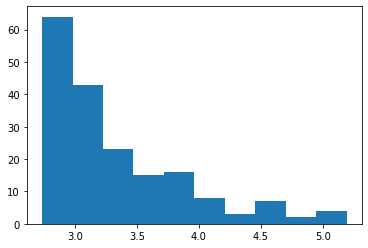

In [31]:
plt.hist(np.log10(final_flares["4-10 keV"]))

# Demonstrate Incorrect File Finding Issue

In [46]:
i=40
tstart = stix_flare_w_files.iloc[i]['start_UTC']
tend = stix_flare_w_files.iloc[i]['end_UTC']
req_id = stix_flare_w_files.iloc[i]['Request IDs']

In [47]:
req_id

'2211110132'

In [48]:
res = Fido.search(a.Time(tstart, tend), a.Instrument.stix, a.stix.DataProduct.sci_xray_cpd)


In [49]:
res

Start Time,End Time,Instrument,Level,DataType,DataProduct,Ver,Request ID
str23,str23,str4,str2,str3,str12,str3,int64
2022-11-11 13:30:50.000,2022-11-11 13:45:04.000,STIX,L1,SCI,sci-xray-cpd,V01,2211115723
2022-11-11 13:44:13.000,2022-11-11 13:50:19.000,STIX,L1,SCI,sci-xray-cpd,V01,2211110132
2022-11-11 13:54:39.000,2022-11-11 14:00:21.000,STIX,L1,SCI,sci-xray-cpd,V01,2211118828


In [50]:
res_filtered = res["stix"][res["stix"]["Request ID"] == req_id]

/opt/anaconda3/envs/stix_conda/lib/python3.10/site-packages/astropy/table/column.py:330: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


In [51]:
res["stix"][res["stix"]["Request ID"] == req_id]

Start Time,End Time,Instrument,Level,DataType,DataProduct,Ver,url,Request ID
str23,str23,str4,str2,str3,str12,str3,str144,int64
2022-11-11 13:30:50.000,2022-11-11 13:45:04.000,STIX,L1,SCI,sci-xray-cpd,V01,http://pub099.cs.technik.fhnw.ch/data/fits/L1/2022/11/11/SCI/solo_L1_stix-sci-xray-cpd_20221111T133050-20221111T134504_V01_2211115723-54718.fits,2211115723


In [43]:
res_filtered

Start Time,End Time,Instrument,Level,DataType,DataProduct,Ver,url,Request ID
str23,str23,str4,str2,str3,str12,str3,str144,int64
2022-11-11 10:39:32.000,2022-11-11 10:51:20.000,STIX,L1,SCI,sci-xray-cpd,V01,http://pub099.cs.technik.fhnw.ch/data/fits/L1/2022/11/11/SCI/solo_L1_stix-sci-xray-cpd_20221111T103932-20221111T105120_V01_2211112382-54715.fits,2211112382


In [39]:
res_filtered2 = res["stix"][res["stix"]["Request ID"] == int(req_id)]

In [40]:
res_filtered2

Start Time,End Time,Instrument,Level,DataType,DataProduct,Ver,Request ID
str23,str23,str4,str2,str3,str12,str3,int64
2022-11-11 10:50:03.000,2022-11-11 11:00:22.000,STIX,L1,SCI,sci-xray-cpd,V01,2211117066


In [41]:
dir()

['Fido',
 'In',
 'Out',
 'STIXClient',
 'Time',
 '_',
 '_10',
 '_12',
 '_15',
 '_18',
 '_21',
 '_23',
 '_24',
 '_25',
 '_26',
 '_28',
 '_29',
 '_30',
 '_31',
 '_32',
 '_34',
 '_36',
 '_38',
 '_40',
 '__',
 '___',
 '__builtin__',
 '__builtins__',
 '__doc__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_dh',
 '_i',
 '_i1',
 '_i10',
 '_i11',
 '_i12',
 '_i13',
 '_i14',
 '_i15',
 '_i16',
 '_i17',
 '_i18',
 '_i19',
 '_i2',
 '_i20',
 '_i21',
 '_i22',
 '_i23',
 '_i24',
 '_i25',
 '_i26',
 '_i27',
 '_i28',
 '_i29',
 '_i3',
 '_i30',
 '_i31',
 '_i32',
 '_i33',
 '_i34',
 '_i35',
 '_i36',
 '_i37',
 '_i38',
 '_i39',
 '_i4',
 '_i40',
 '_i41',
 '_i5',
 '_i6',
 '_i7',
 '_i8',
 '_i9',
 '_ih',
 '_ii',
 '_iii',
 '_oh',
 'a',
 'astrospice',
 'columns',
 'earth_coords',
 'exit',
 'flare_peak_times',
 'frames',
 'get_aux_data',
 'get_ipython',
 'get_pixel_data',
 'i',
 'kernals',
 'mask',
 'np',
 'pd',
 'plt',
 'quit',
 'req_id',
 'res',
 'res_filtered',
 'res_filtered2',
 'solo_coords',
 'stix

In [31]:
int(req_id)

2211110132

In [30]:
type(2211110132)

int

In [32]:
res["stix"]["Request ID"] == int(req_id)

array([False,  True, False])

In [27]:
mask = res['stix']["Request ID"] == 2211110132

In [28]:
mask

array([False,  True, False])

In [23]:
res_filtered

Start Time,End Time,Instrument,Level,DataType,DataProduct,Ver,url,Request ID
str23,str23,str4,str2,str3,str12,str3,str144,int64
2022-11-11 13:30:50.000,2022-11-11 13:45:04.000,STIX,L1,SCI,sci-xray-cpd,V01,http://pub099.cs.technik.fhnw.ch/data/fits/L1/2022/11/11/SCI/solo_L1_stix-sci-xray-cpd_20221111T133050-20221111T134504_V01_2211115723-54718.fits,2211115723


In [83]:
final_flares.iloc[i]

flare_id                                                             2211111346
att_in                                                                    False
GOES_flux                                                              0.000001
start_UTC                                               2022-11-11T13:32:56.086
peak_UTC                                                2022-11-11 13:46:32.087
end_UTC                                                 2022-11-11T13:55:48.088
4-10 keV                                                                  12799
10-15 keV                                                                  3199
number_available_files                                                        1
available_file_request_IDs                                         [2211110132]
solo_lat                                                               9.122204
solo_lon                                                             -22.063143
solo_AU_distance                        

In [82]:
i=40
tstart = final_flares.iloc[i]['start_UTC']
tend = final_flares.iloc[i]['end_UTC']
req_id = final_flares.iloc[i]['Request IDs']

In [67]:
print(tstart,tend)

2022-11-11T10:49:48.069 2022-11-11T11:00:04.070


In [84]:
res = Fido.search(a.Time(tstart, tend), a.Instrument.stix, a.stix.DataProduct.sci_xray_cpd)


In [76]:
res

Start Time,End Time,Instrument,Level,DataType,DataProduct,Ver,Request ID
str23,str23,str4,str2,str3,str12,str3,int64
2022-11-11 10:39:32.000,2022-11-11 10:51:20.000,STIX,L1,SCI,sci-xray-cpd,V01,2211112382
2022-11-11 10:50:03.000,2022-11-11 11:00:22.000,STIX,L1,SCI,sci-xray-cpd,V01,2211117066


In [70]:
req_id

2211117066

In [56]:
res['stix']

Start Time,End Time,Instrument,Level,DataType,DataProduct,Ver,Request ID
str23,str23,str4,str2,str3,str12,str3,int64
2022-11-11 01:24:58.000,2022-11-11 01:40:12.000,STIX,L1,SCI,sci-xray-cpd,V01,2211113411
2022-11-11 01:44:45.000,2022-11-11 01:55:45.000,STIX,L1,SCI,sci-xray-cpd,V01,2211118377


In [85]:
res_filtered = res["stix"][res["stix"]["Request ID"] == req_id]

In [86]:
res

Start Time,End Time,Instrument,Level,DataType,DataProduct,Ver,Request ID
str23,str23,str4,str2,str3,str12,str3,int64
2022-11-11 13:30:50.000,2022-11-11 13:45:04.000,STIX,L1,SCI,sci-xray-cpd,V01,2211115723
2022-11-11 13:44:13.000,2022-11-11 13:50:19.000,STIX,L1,SCI,sci-xray-cpd,V01,2211110132
2022-11-11 13:54:39.000,2022-11-11 14:00:21.000,STIX,L1,SCI,sci-xray-cpd,V01,2211118828


In [88]:
res = res["stix"][res["stix"]["Request ID"] == req_id]

In [89]:
res

Start Time,End Time,Instrument,Level,DataType,DataProduct,Ver,Request ID
str23,str23,str4,str2,str3,str12,str3,int64
2022-11-11 13:44:13.000,2022-11-11 13:50:19.000,STIX,L1,SCI,sci-xray-cpd,V01,2211110132


In [87]:
res_filtered

Start Time,End Time,Instrument,Level,DataType,DataProduct,Ver,Request ID
str23,str23,str4,str2,str3,str12,str3,int64
2022-11-11 13:44:13.000,2022-11-11 13:50:19.000,STIX,L1,SCI,sci-xray-cpd,V01,2211110132


# Test (Shane)

In [1]:
from sunpy.net import Fido, attrs as a
from stixpy.net import client


In [2]:

query = Fido.search(a.Time('2022-11-11T13:32:56.086', '2022-11-11T13:55:48.088'), 
                    a.Instrument.stix, a.stix.DataProduct.sci_xray_cpd)
print(query)


Results from 1 Provider:

3 Results from the STIXClient:

       Start Time               End Time        Instrument Level DataType DataProduct  Ver Request ID
----------------------- ----------------------- ---------- ----- -------- ------------ --- ----------
2022-11-11 13:30:50.000 2022-11-11 13:45:04.000       STIX    L1      SCI sci-xray-cpd V01 2211115723
2022-11-11 13:44:13.000 2022-11-11 13:50:19.000       STIX    L1      SCI sci-xray-cpd V01 2211110132
2022-11-11 13:54:39.000 2022-11-11 14:00:21.000       STIX    L1      SCI sci-xray-cpd V01 2211118828




In [3]:
mask = query['stix']["Request ID"] == 2211110132
print(mask)

[False  True False]


In [4]:
file = Fido.fetch(query['stix'][mask])
print(file)

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221111T134413-20221111T135019_V01_2211110132-50214.fits:   0%|          | 0.00/2.8…

['/Users/hannahcollier/sunpy/data/solo_L1_stix-sci-xray-cpd_20221111T134413-20221111T135019_V01_2211110132-50214.fits']


In [8]:
res2 = query["stix"][query["stix"]["Request ID"] == 2211110132]

In [10]:
res2

Start Time,End Time,Instrument,Level,DataType,DataProduct,Ver,Request ID
str23,str23,str4,str2,str3,str12,str3,int64
2022-11-11 13:44:13.000,2022-11-11 13:50:19.000,STIX,L1,SCI,sci-xray-cpd,V01,2211110132


In [6]:
import stixpy

In [7]:
stixpy.__version__

'0.1.0rc2'